In [36]:
%matplotlib inline
import pandas as pd
import numpy as np
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [37]:
N = 60 # number of days for test split
i = 1800 # one example time series to train

In [38]:
all_data = pd.read_csv("../input/train_1.csv").T
key = pd.read_csv("../input/key_1.csv")

In [39]:
#Handle N/A
train, test = all_data.iloc[0:-N,:], all_data.iloc[-N:,:]

test_cleaned = test.T.fillna(method='ffill').T
train_cleaned = train.T.iloc[:,1:].fillna(method='ffill').T

In [40]:
#fill outliers that are out of 1.5*std with rolling median of 56 days
data=train_cleaned.iloc[:,i].to_frame()
data.columns = ['visits']
data['median'] = pd.rolling_median(data.visits,50,min_periods=1)
std_mult = 1.5
data.ix[np.abs(data.visits-data.visits.median())>=(std_mult*data.visits.std()),'visits'] = data.ix[np.abs(data.visits-data.visits.median())>=(std_mult*data.visits.std()),'median']
data.index = pd.to_datetime(data.index)

print(data.tail())

            visits  median
2016-10-28    12.0     6.0
2016-10-29     8.0     6.0
2016-10-30    11.0     6.0
2016-10-31    13.0     6.0
2016-11-01     8.0     6.5


C:\Users\Greg\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_median is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,min_periods=1,center=False).median()


In [41]:
#prophet expects the folllwing label names
X = pd.DataFrame(index=range(0,len(data)))
X['ds'] = data.index
X['y'] = data['visits'].values
X.tail()

,ds,y
485,2016-10-28,12.0
486,2016-10-29,8.0
487,2016-10-30,11.0
488,2016-10-31,13.0
489,2016-11-01,8.0


In [20]:
m = Prophet(yearly_seasonality=True)
m.fit(X)
future = m.make_future_dataframe(periods=N)
future.tail()

,ds
545,2016-12-27
546,2016-12-28
547,2016-12-29
548,2016-12-30
549,2016-12-31


In [21]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
545,2016-12-27,7.598444,4.297718,10.812616
546,2016-12-28,7.463386,3.652265,10.785912
547,2016-12-29,7.663301,4.171799,10.936460
548,2016-12-30,7.687787,4.284011,11.110007
549,2016-12-31,8.920892,5.706805,12.841746


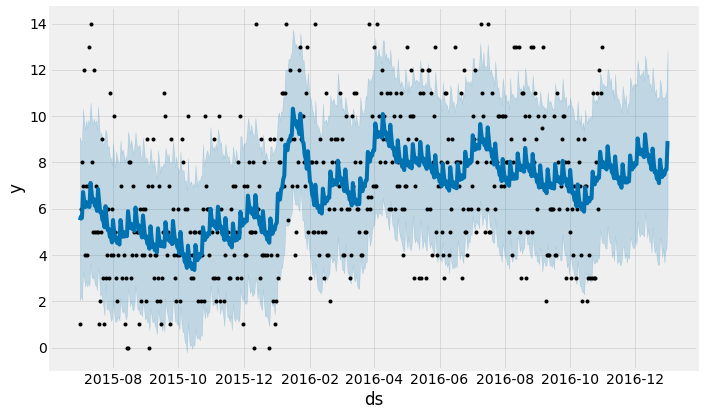

In [22]:
m.plot(forecast);

In [23]:
y_truth = test_cleaned.iloc[:,i].values
y_forecasted = forecast.iloc[-N:,2].values


denominator = (np.abs(y_truth) + np.abs(y_forecasted))
diff = np.abs(y_truth - y_forecasted) / denominator
diff[denominator == 0] = 0.0
print(200 * np.mean(diff))

45.3867395278


In [24]:
print(200 * np.median(diff))

35.747757261


In [26]:
import time

In [44]:
#fill outliers that are out of 1.5*std with rolling median of 56 days
data=train_cleaned.iloc[:,i].to_frame()
data.columns = ['visits']
data['median'] = pd.rolling_median(data.visits,50,min_periods=1)
std_mult = 1.5
data.ix[np.abs(data.visits-data.visits.median())>=(std_mult*data.visits.std()),'visits'] = data.ix[np.abs(data.visits-data.visits.median())>=(std_mult*data.visits.std()),'median']
data.index = pd.to_datetime(data.index)
#prophet expects the folllwing label names
X = pd.DataFrame(index=range(0,len(data)))
X['ds'] = data.index
X['y'] = data['visits'].values
t0=time.time()
m = Prophet(yearly_seasonality=True)
m.fit(X)
future = m.make_future_dataframe(periods=N)
forecast = m.predict(future)
y_forecasted = forecast.iloc[-N:,2].values
print(time.time()-t0)

C:\Users\Greg\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_median is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,min_periods=1,center=False).median()


2.5738401412963867


In [50]:
y_forecasted

array([ 8.56253769,  8.56956469,  8.57659169,  8.5836187 ,  8.5906457 ,
        8.5976727 ,  8.6046997 ,  8.6117267 ,  8.6187537 ,  8.62578071,
        8.63280771,  8.63983471,  8.64686171,  8.65388871,  8.66091571,
        8.66794272,  8.67496972,  8.68199672,  8.68902372,  8.69605072,
        8.70307773,  8.71010473,  8.71713173,  8.72415873,  8.73118573,
        8.73821273,  8.74523974,  8.75226674,  8.75929374,  8.76632074,
        8.77334774,  8.78037475,  8.78740175,  8.79442875,  8.80145575,
        8.80848275,  8.81550975,  8.82253676,  8.82956376,  8.83659076,
        8.84361776,  8.85064476,  8.85767177,  8.86469877,  8.87172577,
        8.87875277,  8.88577977,  8.89280677,  8.89983378,  8.90686078,
        8.91388778,  8.92091478,  8.92794178,  8.93496878,  8.94199579,
        8.94902279,  8.95604979,  8.96307679,  8.97010379,  8.9771308 ])

In [34]:
import numpy as np
import pandas as pd

print('Reading data...')
key_1 = pd.read_csv('../input/key_1.csv')
train_1 = pd.read_csv('../input/train_1.csv')
ss_1 = pd.read_csv('../input/sample_submission_1.csv')

#print('Preprocessing...')
# train_1.fillna(0, inplace=True)

print('Processing...')
ids = key_1.Id.values
pages = key_1.Page.values

print('key_1...')
d_pages = {}
for id, page in zip(ids, pages):
    d_pages[id] = page[:-11]

print('train_1...')
t0=time.time()
pages = train_1.Page.values
# visits = train_1['2016-12-31'].values # Version 1 score: 60.6
# visits = np.round(np.mean(train_1.drop('Page', axis=1).values, axis=1)) # Version 2 score: 64.8
# visits = np.round(np.mean(train_1.drop('Page', axis=1).values[:, -14:], axis=1)) # Version 3 score: 52.5
# visits = np.round(np.mean(train_1.drop('Page', axis=1).values[:, -7:], axis=1)) # Version 4 score: 53.7
# visits = np.round(np.mean(train_1.drop('Page', axis=1).values[:, -21:], axis=1)) # Version 5, 6 score: 51.3
# visits = np.round(np.mean(train_1.drop('Page', axis=1).values[:, -28:], axis=1)) # Version 7 score: 51.1
# visits = np.round(np.median(train_1.drop('Page', axis=1).values[:, -28:], axis=1)) # Version 8 score: 47.1 
# visits = np.round(np.median(train_1.drop('Page', axis=1).values[:, -35:], axis=1)) # Version 9 score: 46.6
# visits = np.round(np.median(train_1.drop('Page', axis=1).values[:, -42:], axis=1)) # Version 10 score: 46.3
# visits = np.round(np.median(train_1.drop('Page', axis=1).values[:, -49:], axis=1)) # Version 11 score: 46.2
# visits = np.nan_to_num(np.round(np.nanmedian(train_1.drop('Page', axis=1).values[:, -49:], axis=1))) # Version 12 score: 45.7
visits = np.nan_to_num(np.round(np.nanmedian(train_1.drop('Page', axis=1).values[:, -56:], axis=1)))

d_visits = {}
for page, visits_number in zip(pages, visits):
    d_visits[page] = visits_number

print(time.time()-t0)
print('Modifying sample submission...')
ss_ids = ss_1.Id.values
ss_visits = ss_1.Visits.values

for i, ss_id in enumerate(ss_ids):
    ss_visits[i] = d_visits[d_pages[ss_id]]

print('Saving submission...')
subm = pd.DataFrame({'Id': ss_ids, 'Visits': ss_visits})
subm.to_csv('submission.csv', index=False)

Reading data...
Processing...
key_1...
train_1...


C:\Users\Greg\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3858: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


3.3769752979278564
Modifying sample submission...
Saving submission...


In [49]:
subm

,Id,Visits
0,bf4edcf969af,3
1,929ed2bf52b9,3
2,ff29d0f51d5c,3
3,e98873359be6,3
4,fa012434263a,3
5,48f1e93517a2,3
6,5def418fcb36,3
7,77bd08134351,3
8,5889e6dbb16f,3
9,5f21fef1d764,3


In [51]:
df_iter = pd.read_csv('input/train_1.csv', low_memory=False, iterator=True, chunksize=1000) #limited chunk size

In [52]:
df_iter

In [ ]:
#%%time
import warnings; warnings.filterwarnings('ignore')
from multiprocessing import Pool, cpu_count
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn import *
import sklearn
import zipfile, zlib
import subprocess

#Phase 1 [Train: Years 2015 Q3-2016 Q4/ Test: Year 2017 Q1]
#Phase 2 [Train: Year 2017 Q1-Q3 / predict 2017 Q4

def transform_df_train(df):
    df['Name'] = df['Page'].map(lambda x: ' '.join(str(x).split('_')[:-3]))
    df['Project'] = df['Page'].map(lambda x: str(x).split('_')[-3])
    df['Access'] = df['Page'].map(lambda x: str(x).split('_')[-2])
    df['Agent'] = df['Page'].map(lambda x: str(x).split('_')[-1])
    d = {}
    for y in range(15,18):
        for m in range(12):
            d['quarter'+str(y)+str(m+1).zfill(2)] = [c for c in df.columns if '20' + str(y) + '-' + str(m+1).zfill(2) in c]
    for k in d:
        if len(d[k])>0:
            df['Visits'] = df[d[k]].fillna(0).median(axis=1,  numeric_only=True)
            df = df.drop(d[k],axis=1)
    con = []
    for k in d:
        if len(d[k])>0:
            dfx = df[['Name','Project','Access','Agent','Visits']]
            dfx['Year'] = int(k[-4:-2])
            dfx['Month'] = int(k[-2:])
            con.append(dfx.copy())
    df = pd.concat(con, axis=0, ignore_index=True)
    return df

def transform_df_test(df):
    df['Name'] = df['Page'].map(lambda x: ' '.join(str(x).split('_')[:-4]))
    df['Project'] = df['Page'].map(lambda x: str(x).split('_')[-4])
    df['Access'] = df['Page'].map(lambda x: str(x).split('_')[-3])
    df['Agent'] = df['Page'].map(lambda x: str(x).split('_')[-2])
    df['Date'] = df['Page'].map(lambda x: str(x).split('_')[-1])
    df['Year'] = df['Date'].map(lambda x: int(str(x)[2:4]))
    df['Month'] =df['Date'].map(lambda x: int(str(x)[5:7]))
    return df[['Id','Name','Project','Access','Agent','Year','Month']]

print('multiprocess train...')
pool_dfs = []
df_iter = pd.read_csv('input/train_1.csv', low_memory=False, iterator=True, chunksize=1000) #limited chunk size
for df in df_iter:
    if len(df)>0:
        pool_dfs.append(df)
    #break #limiting for Kaggle Kernels
p = Pool(cpu_count())
train = p.map(transform_df_train, pool_dfs)
train = pd.concat(train, axis=0, ignore_index=True).reset_index(drop=True)
p.close()
p.join()
print(train.values.shape)

C:\Users\Greg\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Greg\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\Greg\Anaconda3\lib\site-packages\sklearn\lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
C:\Users\Greg\Anaconda3\

multiprocess train...


In [ ]:
print('multiprocess test...')
pool_dfs = []
df_iter = pd.read_csv('../input/key_1.csv', low_memory=False, iterator=True, chunksize=2000) #limited chunk size
for df in df_iter:
    if len(df)>0:
        pool_dfs.append(df)
    #break #limiting for Kaggle Kernels
p = Pool(cpu_count())
test = p.map(transform_df_test, pool_dfs)
test = pd.concat(test, axis=0, ignore_index=True).reset_index(drop=True)
p.close()
p.join()
print(test.values.shape)

for c in ['Project','Access','Agent']: #,'Name'
    lbl = preprocessing.LabelEncoder()
    lbl.fit(sorted(list(set(list(train[c].unique()) + list(test[c].unique())))))
    train[c] = lbl.transform(train[c].values)
    test[c] = lbl.transform(test[c].values)
    print(c)

y = train['Visits'].values
sub = pd.read_csv('../input/sample_submission_1.csv')#[:2000] #limiting for Kaggle Kernels
sub = pd.merge(sub, test, how='left', on='Id')

class cust_regression_vals(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin):
    def fit(self, x, y=None):
        return self
    def transform(self, x):
        x = x.drop(['Name'],axis=1).values
        return x

class cust_txt_col(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin):
    def __init__(self, key):
        self.key = key
    def fit(self, x, y=None):
        return self
    def transform(self, x):
        return x[self.key].apply(str)

fp = pipeline.Pipeline([
    ('union', pipeline.FeatureUnion(
        n_jobs = -1,
        transformer_list = [
            ('standard', cust_regression_vals()),
            ('pi1', pipeline.Pipeline([('Page1', cust_txt_col('Name')), ('count_Page', feature_extraction.text.CountVectorizer(ngram_range=(1, 2))), ('tsvd1', decomposition.TruncatedSVD(n_components=20, n_iter=10, random_state=12))])),
            ('pi2', pipeline.Pipeline([('Page2', cust_txt_col('Name')), ('tfidf_Page', feature_extraction.text.TfidfVectorizer(ngram_range=(1, 2), max_df=0.8, min_df=5)), ('tsvd3', decomposition.TruncatedSVD(n_components=20, n_iter=10, random_state=12))]))
        ])
    )])

xcol = ['Name','Project','Access','Agent','Year','Month']
xtrain = fp.fit_transform(train[xcol]); print(xtrain.shape)

print(sub.values.shape)
tlen = int(len(sub) / 8)
nps = []
for i in range(0, len(sub), tlen):
    nps.append(fp.transform(sub[xcol][i:i+tlen]))
xtest = np.concatenate(nps, axis=0)
print(xtest.shape)        
sub = sub[['Id','Visits']]


In [ ]:
#https://en.wikipedia.org/wiki/Symmetric_mean_absolute_percentage_error
def xgb_smape_score(preds, dtrain):
    labels = dtrain.get_label()
    denom = ((np.abs(labels) + np.abs(preds))) / 2
    score = np.abs(preds - labels) / denom
    score[denom == 0] = 0.0
    score = (100/len(preds)) * np.sum(score)
    return 'smape', score

fold = 1
for i in range(fold):
    params = {
        'eta': 0.02,
        'max_depth': 4,
        'objective': 'reg:linear',
        #'eval_metric': 'rmse', #'rmse','mae','mse'
        #'base_score': np.median(y),
        'seed': i,
        'silent': True
    }
    x1, x2, y1, y2 = model_selection.train_test_split(xtrain, y, test_size=0.3, random_state=i)
    watchlist = [(xgb.DMatrix(x1, y1), 'train'), (xgb.DMatrix(x2, y2), 'valid')]
    model = xgb.train(params, xgb.DMatrix(x1, y1), 2000,  watchlist, feval=xgb_smape_score, maximize=False, verbose_eval=50, early_stopping_rounds=50)
    if i != 0:
        pred += model.predict(xgb.DMatrix(xtest), ntree_limit=model.best_ntree_limit)
    else:
        pred = model.predict(xgb.DMatrix(xtest), ntree_limit=model.best_ntree_limit)
pred /= fold
sub['Visits'] = pred #pred.clip(min(y),max(y)).astype(int)
sub[['Id','Visits']].to_csv('../output/submission.csv', index=False)
#z = zipfile.ZipFile('submission.csv.zip', mode='w')
#z.write("submission.csv", compress_type=zipfile.ZIP_DEFLATED) #zipfile.ZIP_STORED
#z.close()
#subprocess.call(['7z', 'a', 'submission.csv.7z', 'submission.csv'])
print('Done...')